In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer,OneHotEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE    
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.svm import OneClassSVM
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
from sklearn.metrics import accuracy_score, roc_curve, auc ,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter
from tabulate import tabulate
from matplotlib.pylab import randint
from imblearn.over_sampling import ADASYN

In [2]:
train_data = pd.read_csv('train_Insurance.csv')
test_data = pd.read_csv('test_insurance.csv')

In [3]:
# Suppression de la colonne 'Customer Id'
train_data.drop(columns=['Customer Id'], inplace=True)
test_data.drop(columns=['Customer Id'], inplace=True)

In [4]:
import pandas as pd

def save_missing_values_to_excel(df, output_path='missing_values.xlsx'):
    """
    Fonction pour détecter les valeurs manquantes dans un DataFrame
    et sauvegarder les résultats dans un fichier Excel.

    Args:
    - df (pd.DataFrame): Le DataFrame à analyser.
    - output_path (str): Le chemin du fichier Excel à générer.

    Returns:
    - None
    """
    # Calcul du nombre de valeurs manquantes par colonne
    missing_counts = df.isnull().sum()
    
    # Convertir les résultats en DataFrame pour Excel
    missing_df = pd.DataFrame({
        'Colonnes': missing_counts.index,
        'Valeurs manquantes': missing_counts.values
    })
    
    # Sauvegarder dans un fichier Excel
    missing_df.to_excel(output_path, index=False)
    print(f"Les valeurs manquantes ont été enregistrées dans le fichier : {output_path}")





save_missing_values_to_excel(train_data)


Les valeurs manquantes ont été enregistrées dans le fichier : missing_values.xlsx


In [5]:
def Valeur_Manquantes(df):
    """Afficher les valeurs manquantes dans un DataFrame."""
    missing_values = df.isna().sum()
    print("\n===== Résumé des Valeurs Manquantes =====")
    print(tabulate(missing_values.reset_index(), headers=['Colonne', 'Valeurs Manquantes'], tablefmt='grid'))

print(Valeur_Manquantes(train_data))



===== Résumé des Valeurs Manquantes =====
+----+--------------------+----------------------+
|    | Colonne            |   Valeurs Manquantes |
+====+====================+======================+
|  0 | YearOfObservation  |                    0 |
+----+--------------------+----------------------+
|  1 | Insured_Period     |                    0 |
+----+--------------------+----------------------+
|  2 | Residential        |                    0 |
+----+--------------------+----------------------+
|  3 | Building_Painted   |                    0 |
+----+--------------------+----------------------+
|  4 | Building_Fenced    |                    0 |
+----+--------------------+----------------------+
|  5 | Garden             |                    4 |
+----+--------------------+----------------------+
|  6 | Settlement         |                    0 |
+----+--------------------+----------------------+
|  7 | Building Dimension |                   77 |
+----+--------------------+------------

In [6]:
def Satistics_Data(df):
    """Afficher les statistiques descriptives d'un DataFrame."""
    description = df.describe(include='all')
    print("\n===== Résumé Statistique =====")
    print(tabulate(description, headers=description.columns, tablefmt='grid'))

print(Satistics_Data(train_data))


===== Résumé Statistique =====
+--------+---------------------+------------------+---------------+--------------------+-------------------+----------+--------------+----------------------+-----------------+-------------------+------------+---------+
|        |   YearOfObservation |   Insured_Period |   Residential | Building_Painted   | Building_Fenced   | Garden   | Settlement   |   Building Dimension | Building_Type   | NumberOfWindows   |   Geo_Code | Claim   |
+========+=====================+==================+===============+====================+===================+==========+==============+======================+=================+===================+============+=========+
| count  |          5012       |      5012        |   5012        | 5012               | 5012              | 5008     | 5012         |              4935    | 5012            | 5012              |       4939 | 5012    |
+--------+---------------------+------------------+---------------+--------------------+----

In [7]:
def Type_Col(df):
    data_types = df.dtypes
    print("\n===== Types de Données =====")
    print(tabulate(data_types.reset_index(), headers=['Colonne', 'Type de Donnée'], tablefmt='grid'))

# Appeler la fonction sur votre DataFrame
print(Type_Col(train_data))


===== Types de Données =====
+----+--------------------+------------------+
|    | Colonne            | Type de Donnée   |
+====+====================+==================+
|  0 | YearOfObservation  | int64            |
+----+--------------------+------------------+
|  1 | Insured_Period     | float64          |
+----+--------------------+------------------+
|  2 | Residential        | int64            |
+----+--------------------+------------------+
|  3 | Building_Painted   | object           |
+----+--------------------+------------------+
|  4 | Building_Fenced    | object           |
+----+--------------------+------------------+
|  5 | Garden             | object           |
+----+--------------------+------------------+
|  6 | Settlement         | object           |
+----+--------------------+------------------+
|  7 | Building Dimension | float64          |
+----+--------------------+------------------+
|  8 | Building_Type      | object           |
+----+--------------------+---

In [8]:
def find_and_clean_duplicates(df):
    """Afficher et nettoyer les doublons dans un DataFrame."""
    # Trouver les doublons
    duplicates = df.iloc[:, 1:][df.iloc[:, 1:].duplicated()]
    
    print("\n===== Doublons =====")
    if not duplicates.empty:
        # Afficher les doublons trouvés
        print(tabulate(duplicates, headers=duplicates.columns, tablefmt='grid'))
        
        # Supprimer les doublons
        df.drop_duplicates(inplace=True)
        
        print("\nLes doublons ont été supprimés.")
    else:
        print("Aucun doublon trouvé.")
    
    return df

# Exemple d'utilisation
train_data = find_and_clean_duplicates(train_data)
test_data = find_and_clean_duplicates(test_data)


===== Doublons =====
+------+------------------+---------------+--------------------+-------------------+----------+--------------+----------------------+-----------------+-------------------+------------+---------+
|      |   Insured_Period |   Residential | Building_Painted   | Building_Fenced   | Garden   | Settlement   |   Building Dimension | Building_Type   | NumberOfWindows   | Geo_Code   | Claim   |
+======+==================+===============+====================+===================+==========+==============+======================+=================+===================+============+=========+
|  171 |              1   |             0 | V                  | N                 | O        | R            |                 1350 | Non-combustible | 4                 | 26058      | non     |
+------+------------------+---------------+--------------------+-------------------+----------+--------------+----------------------+-----------------+-------------------+------------+---------+
|  

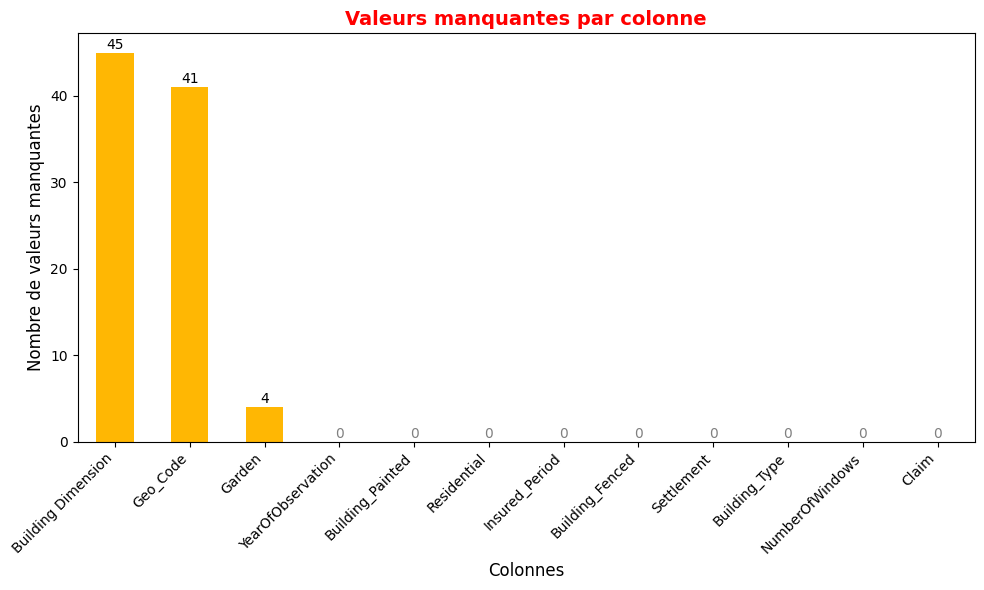

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_missing_values(df):
    missing_counts = df.isnull().sum()

    # Création du graphique en barres
    plt.figure(figsize=(10, 6))
    bars = missing_counts.sort_values(ascending=False)
    bars.plot(kind='bar', color='#ffb703')

    plt.title('Valeurs manquantes par colonne', fontsize=14, color='red', weight='bold')
    plt.xlabel('Colonnes', fontsize=12)
    plt.ylabel('Nombre de valeurs manquantes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Ajouter les valeurs au-dessus des barres
    for index, value in enumerate(bars):
        if value > 0:
            plt.text(index, value + (max(bars) * 0.01), str(value), ha='center', fontsize=10)
        else:
            plt.text(index, value + (max(bars) * 0.01), '0', ha='center', fontsize=10, color='gray')

    plt.tight_layout()
    plt.show()

plot_missing_values(train_data)


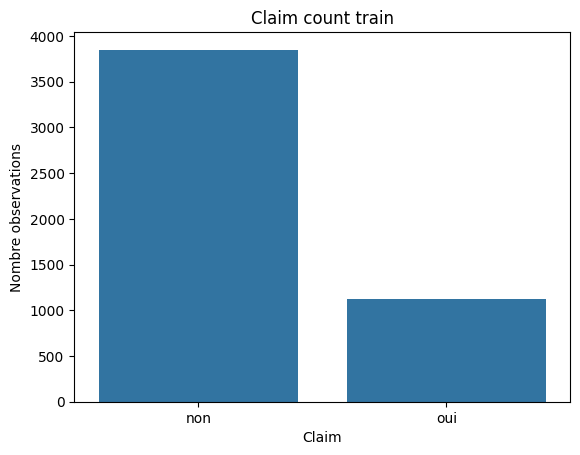

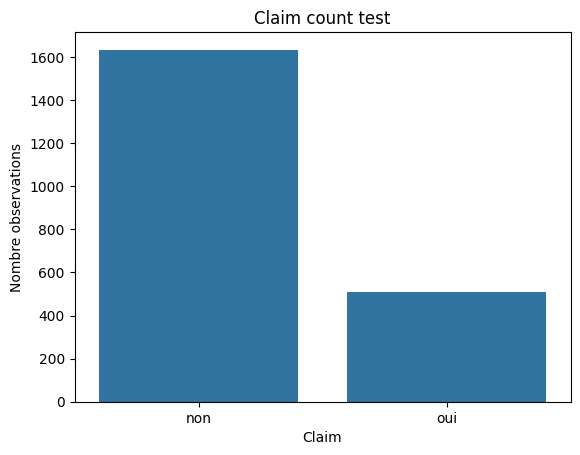

In [10]:
def plot_value_counts(df, title):
    value_counts = df['Claim'].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(title)
    plt.xlabel('Claim')
    plt.ylabel('Nombre observations')
    plt.show()

plot_value_counts(train_data, 'Claim count train')
plot_value_counts(test_data, 'Claim count test')


In [11]:
def unique_val(df):
  for col in df.columns:
    print(col,df[col].unique())

unique_val(train_data)

YearOfObservation [2012 2013 2016 2014 2015]
Insured_Period [1.  0.5]
Residential [1 0]
Building_Painted ['N' 'V']
Building_Fenced ['V' 'N']
Garden ['V' 'O' nan]
Settlement ['U' 'R']
Building Dimension [ 1240.   900.  4984. ...  4430. 16459.   173.]
Building_Type ['Wood-framed' 'Non-combustible' 'Ordinary' 'Fire-resistive']
NumberOfWindows ['without' '4' '2' '7' '5' '3' '8' '>=10' '6' '1' '9']
Geo_Code ['75117' '62916' '31149' ... '45232' '42225' '94059']
Claim ['non' 'oui']


In [12]:
def transform_to_intervals(value):
    if value == 'without':
        return 0  # Pas de fenêtres
    elif value.startswith('>='):
        return 4  # Catégorie "10+"
    else:
        num = int(value)
        if num <= 3:
            return 1  # Catégorie "1-3"
        elif num <= 6:
            return 2  # Catégorie "4-6"
        elif num <= 9:
            return 3  # Catégorie "7-9"
        else:
            return 4  # Catégorie "10+"

# Application de la transformation
train_data['NumberOfWindows'] = train_data['NumberOfWindows'].apply(transform_to_intervals)
test_data['NumberOfWindows']=test_data['NumberOfWindows'].apply(transform_to_intervals)


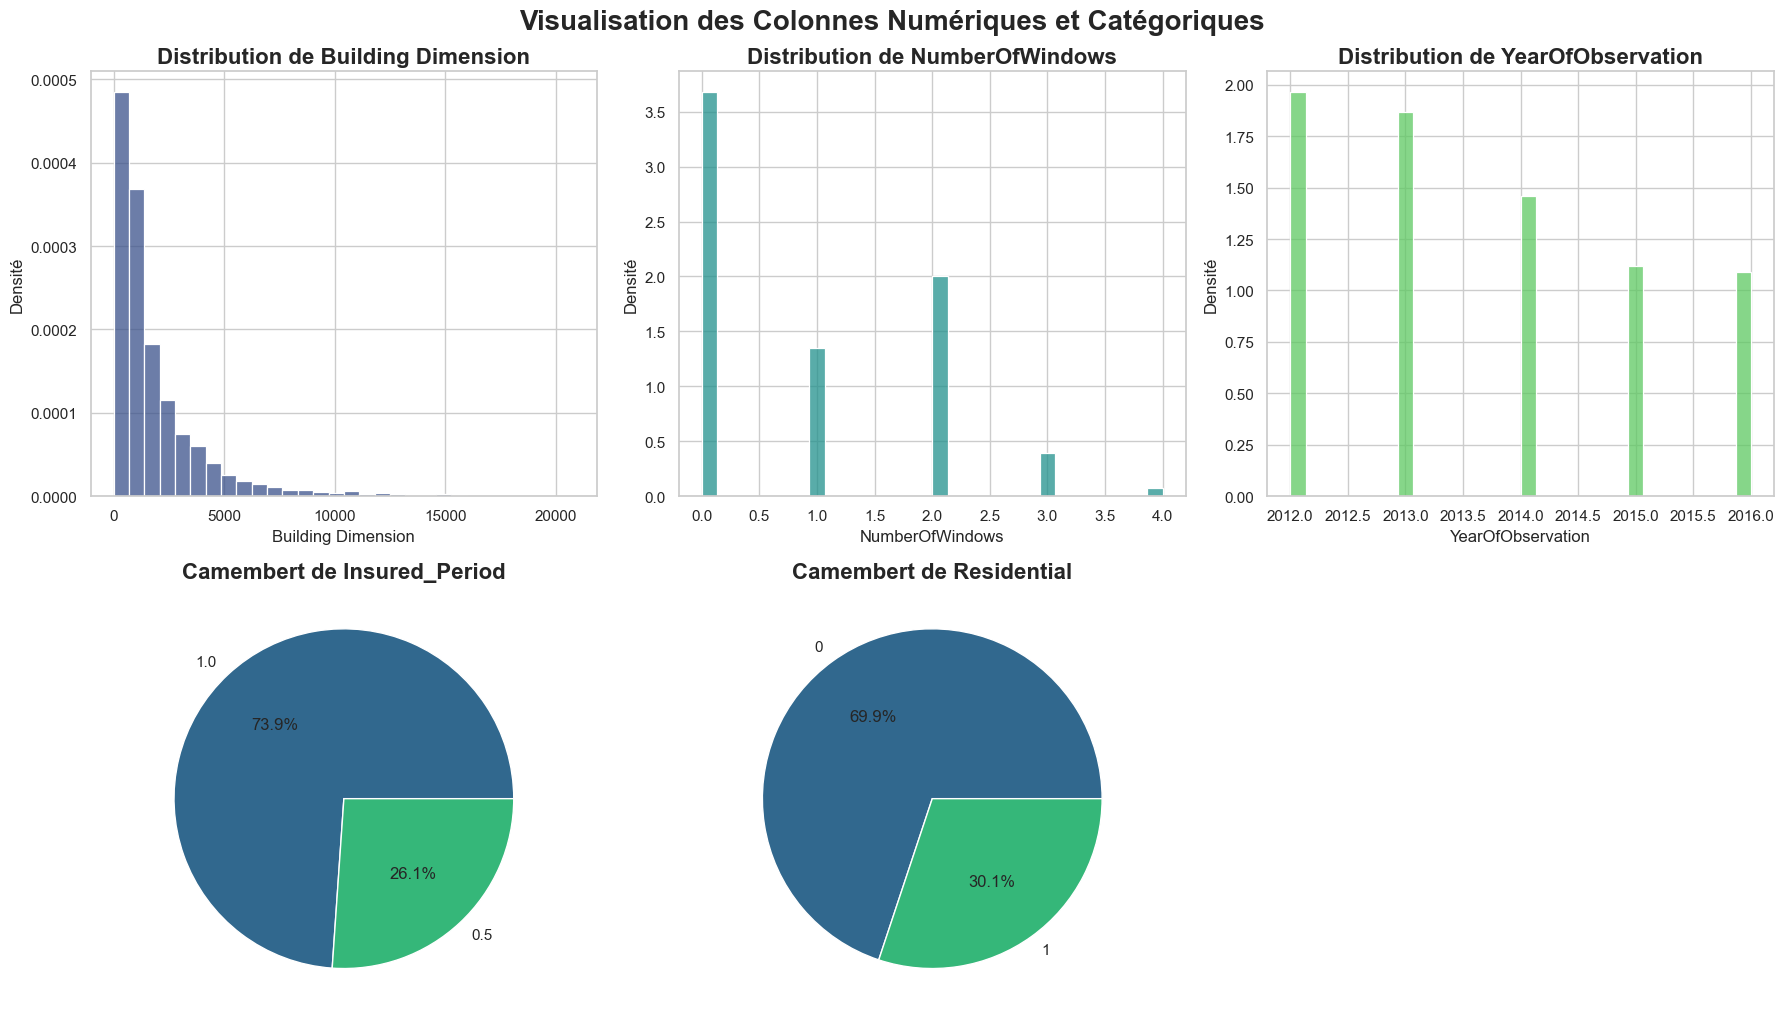

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_and_pie_charts(df, numeric_columns, pie_columns):
    """
    Affiche des histogrammes pour les colonnes numériques et des graphiques en camembert pour des colonnes catégoriques spécifiques.
    """
    sns.set_theme(style="whitegrid", palette="pastel")
    
    # Définir la configuration de la grille
    total_plots = len(numeric_columns) + len(pie_columns)
    num_cols = 3  # Nombre de colonnes
    num_rows = (total_plots + num_cols - 1) // num_cols  # Nombre de lignes
    
    # Créer la figure et les sous-graphiques
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    axes = axes.flatten()
    
    # Tracer les colonnes numériques (histogrammes)
    for i, column in enumerate(numeric_columns):
        sns.histplot(
            df[column],
            bins=30,
            stat='density',
            color=sns.color_palette("viridis", len(numeric_columns))[i % len(sns.color_palette("viridis"))],
            ax=axes[i]
        )
        axes[i].set_title(f'Distribution de {column}', fontsize=16, fontweight='bold')
        axes[i].set_xlabel(column, fontsize=12)
        axes[i].set_ylabel('Densité', fontsize=12)
    
    # Tracer les colonnes catégoriques spécifiques (camemberts)
    for j, column in enumerate(pie_columns, start=i + 1):
        df[column].value_counts().plot.pie(
            autopct='%1.1f%%',
            colors=sns.color_palette('viridis', len(df[column].unique())),
            ax=axes[j]
        )
        axes[j].set_title(f'Camembert de {column}', fontsize=16, fontweight='bold')
        axes[j].set_ylabel('')  # Supprimer le label Y
    
    # Supprimer les axes inutilisés si le nombre de colonnes est inférieur à la grille
    for k in range(j + 1, len(axes)):
        fig.delaxes(axes[k])
    
    # Ajuster la mise en page
    plt.tight_layout()
    plt.suptitle('Visualisation des Colonnes Numériques et Catégoriques', fontsize=20, fontweight='bold', y=1.02)
    plt.show()

# Exemple d'utilisation
numeric_columns = train_data.select_dtypes(include=['number']).columns.difference( ['Insured_Period', 'Residential'])
pie_columns = ['Insured_Period', 'Residential']
plot_numeric_and_pie_charts(train_data, numeric_columns, pie_columns)


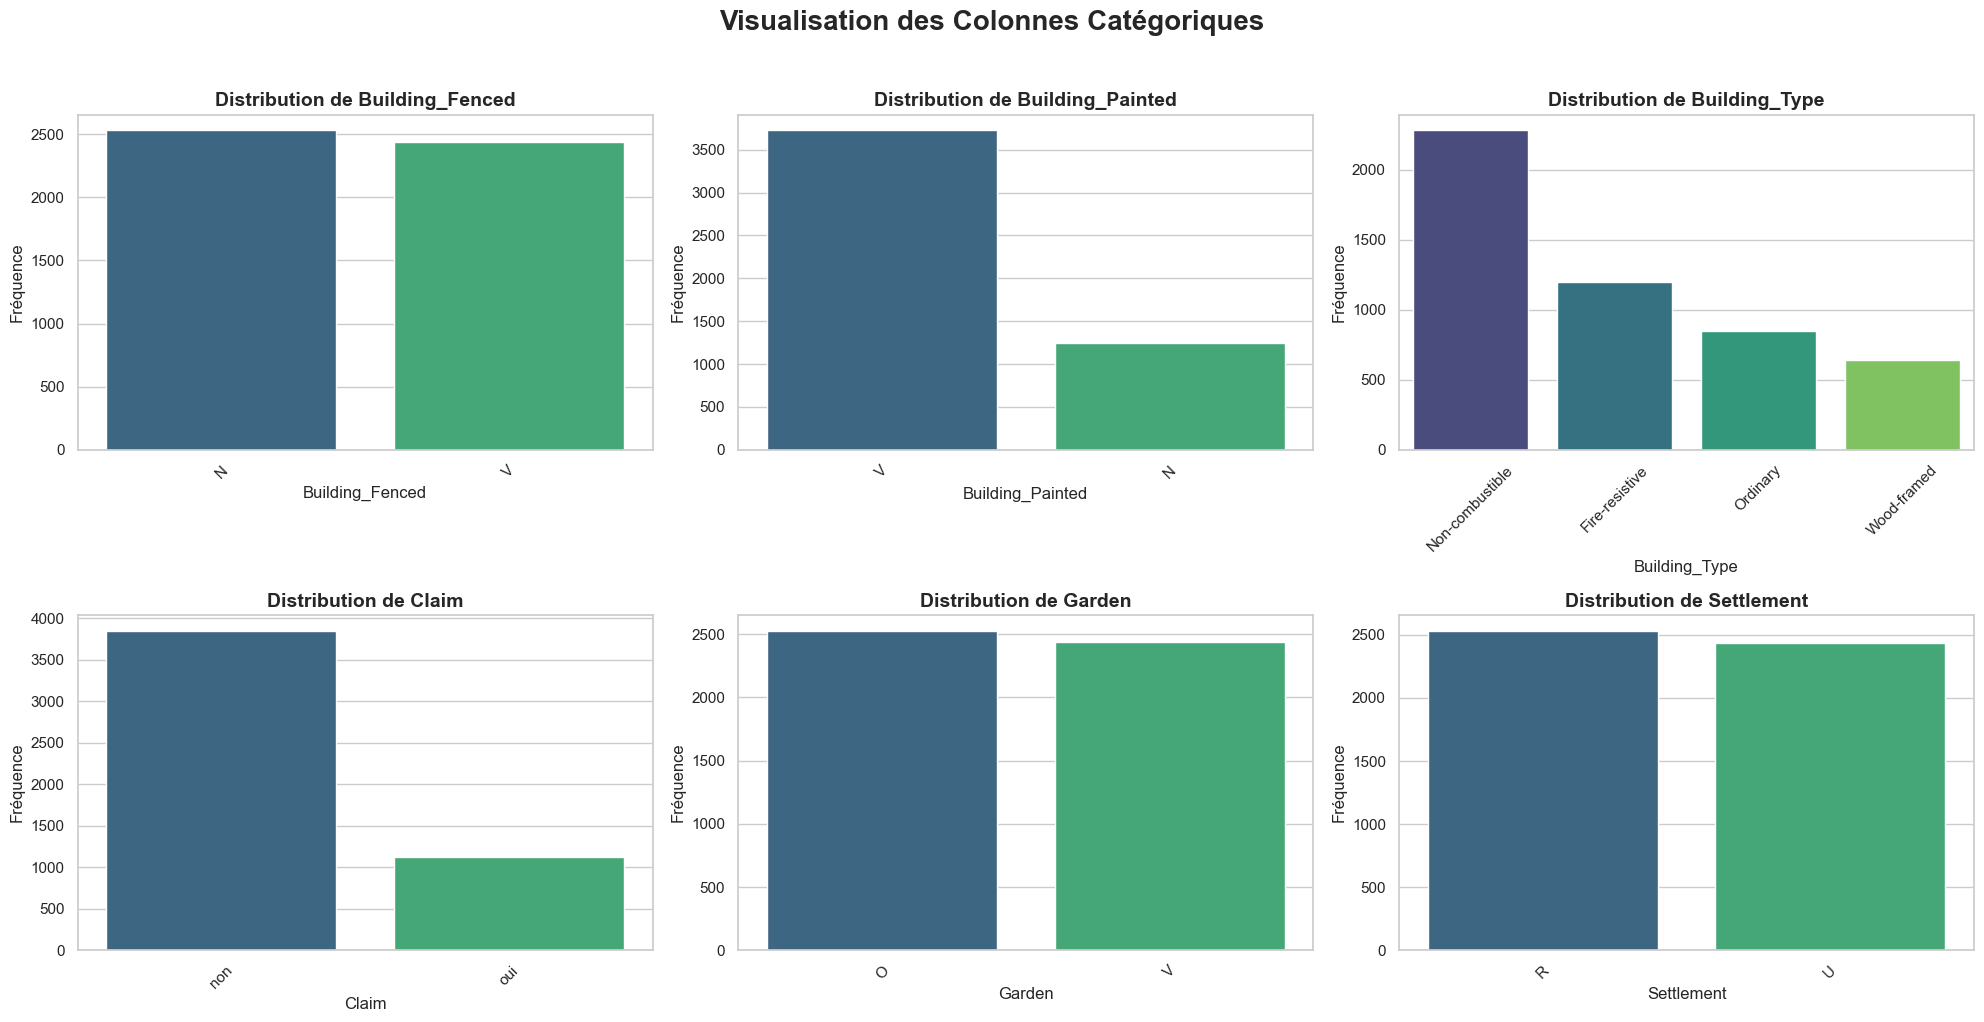

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_columns(df, categorical_columns):
    """
    Affiche des diagrammes en barres pour les colonnes catégoriques avec un style moderne.
    """
    # Configurer un style moderne pour les graphiques
    sns.set_theme(style="whitegrid", palette="pastel")
    
    # Déterminer la configuration de la grille
    num_cols = 3  # Nombre de colonnes dans la grille
    num_plots = len(categorical_columns)  # Nombre total de graphiques
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculer le nombre de lignes nécessaires
    
    # Créer la figure et les sous-graphiques
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(categorical_columns):
        sns.countplot(
            x=column,
            data=df,
            order=df[column].value_counts().index,
            palette='viridis',
            ax=axes[i]
        )
        axes[i].set_title(f'Distribution de {column}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(column, fontsize=12)
        axes[i].set_ylabel('Fréquence', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
    
    # Supprimer les sous-graphiques inutilisés
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajouter un titre principal
    plt.suptitle("Visualisation des Colonnes Catégoriques", fontsize=20, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
categorical_columns = train_data.select_dtypes(exclude=['number']).columns.difference([ 'Geo_Code'])
plot_categorical_columns(train_data, categorical_columns)


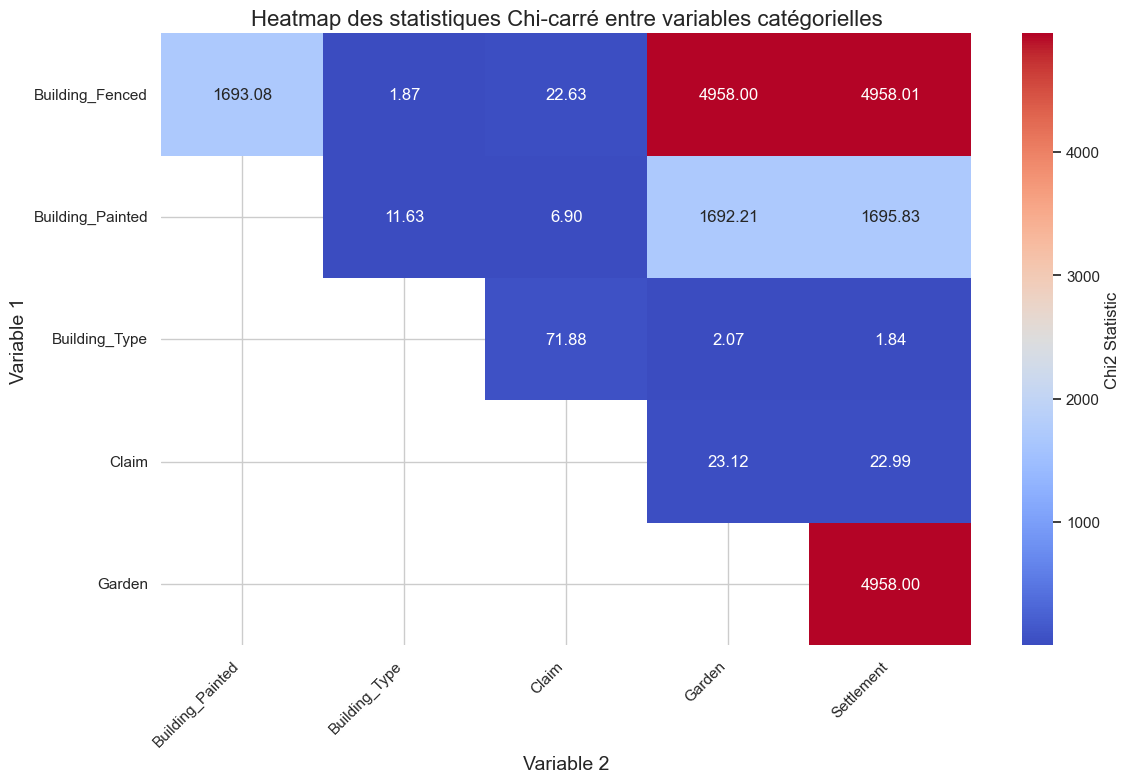

          Variable 1        Variable 2         Chi2       p-value  \
0    Building_Fenced  Building_Painted  1693.082920  0.000000e+00   
1    Building_Fenced            Garden  4958.001684  0.000000e+00   
2   Building_Painted            Garden  1692.212329  0.000000e+00   
3    Building_Fenced        Settlement  4958.006527  0.000000e+00   
4             Garden        Settlement  4958.001573  0.000000e+00   
5   Building_Painted        Settlement  1695.834746  0.000000e+00   
6      Building_Type             Claim    71.879251  1.689591e-15   
7              Claim            Garden    23.123916  1.518897e-06   
8              Claim        Settlement    22.989157  1.629177e-06   
9    Building_Fenced             Claim    22.632543  1.961342e-06   
10  Building_Painted             Claim     6.897623  8.631043e-03   
11  Building_Painted     Building_Type    11.626692  8.777754e-03   
12     Building_Type            Garden     2.069078  5.581938e-01   
13   Building_Fenced     Building_

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def chi2_test_categorical(df, exclude_columns=[]):
    """
    Effectue le test du Chi-carré pour chaque paire de variables catégorielles et génère une heatmap.
    
    Parameters:
        df (DataFrame): Le DataFrame contenant les données.
        exclude_columns (list): Liste des colonnes à exclure des tests.
        
    Returns:
        chi2_results (DataFrame): DataFrame contenant les résultats du test du Chi-carré.
    """
    # Sélectionner les colonnes catégorielles, en excluant les colonnes spécifiées
    categorical_columns = df.select_dtypes(include=['object']).columns.difference(exclude_columns)
    
    # Initialiser un DataFrame pour stocker les résultats
    chi2_results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Chi2', 'p-value', 'Degrees of Freedom'])
    
    # Effectuer le test du Chi-carré pour chaque paire de variables catégorielles
    for i, var1 in enumerate(categorical_columns):
        for var2 in categorical_columns[i + 1:]:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, _ = chi2_contingency(contingency_table)
            chi2_results = pd.concat([chi2_results, pd.DataFrame({
                'Variable 1': [var1],
                'Variable 2': [var2],
                'Chi2': [chi2],
                'p-value': [p],
                'Degrees of Freedom': [dof]
            })], ignore_index=True)
    
    # Ajouter une colonne "Significatif" (p-value < 0.05)
    chi2_results['Significatif'] = chi2_results['p-value'] < 0.05
    
    # Trier les résultats par ordre de p-value croissante
    chi2_results = chi2_results.sort_values(by='p-value').reset_index(drop=True)
    
    # Visualiser les résultats sous forme de heatmap
    # Pivot pour la heatmap
    heatmap_data = chi2_results.pivot(index='Variable 1', columns='Variable 2', values='Chi2')

    # Visualiser la heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data,
        annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Chi2 Statistic'}
    )
    plt.title('Heatmap des statistiques Chi-carré entre variables catégorielles', fontsize=16)
    plt.xlabel('Variable 2', fontsize=14)
    plt.ylabel('Variable 1', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return chi2_results

# Exemple d'utilisation
exclude_columns = ['Geo_Code']  # Colonnes à exclure
chi2_results = chi2_test_categorical(train_data, exclude_columns)

# Affichage des résultats
print(chi2_results)


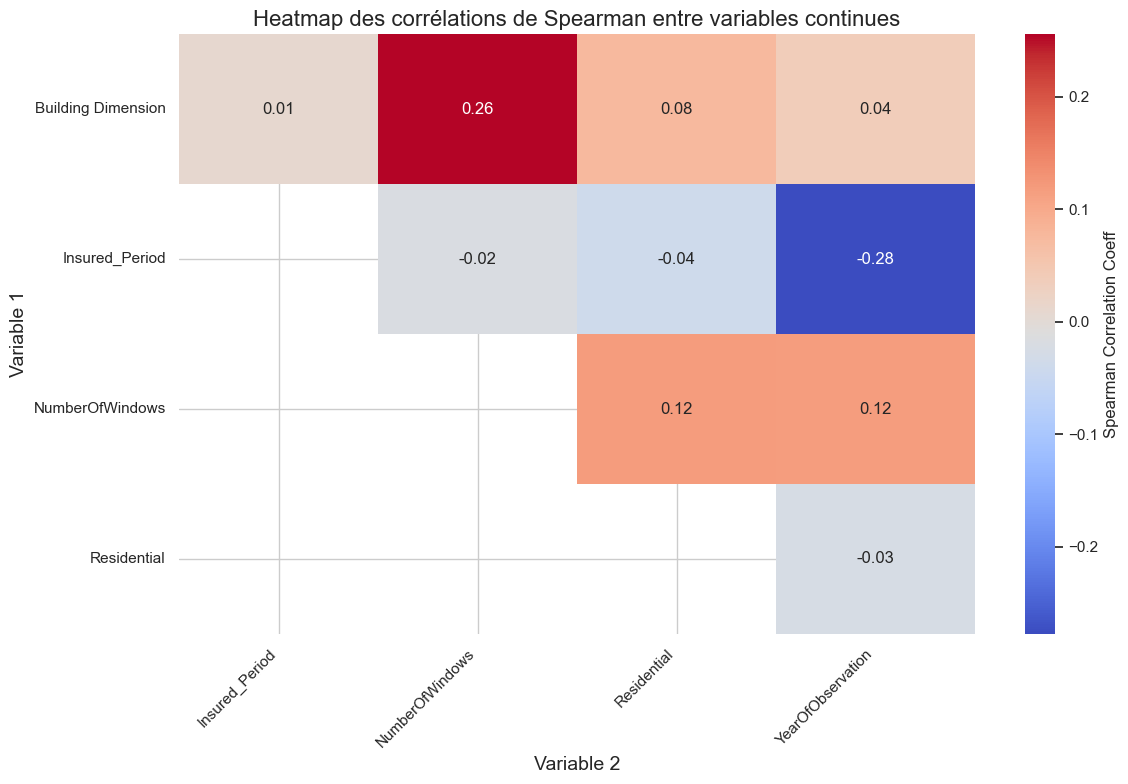

           Variable 1         Variable 2  Spearman Coeff       p-value  \
0      Insured_Period  YearOfObservation       -0.277370  1.769188e-88   
1  Building Dimension    NumberOfWindows        0.255600  2.635030e-74   
2     NumberOfWindows        Residential        0.118827  4.286908e-17   
3     NumberOfWindows  YearOfObservation        0.117367  1.034484e-16   
4  Building Dimension        Residential        0.076427  7.872894e-08   
5      Insured_Period        Residential       -0.038550  6.566648e-03   
6  Building Dimension  YearOfObservation        0.037912  7.793311e-03   
7         Residential  YearOfObservation       -0.025144  7.632094e-02   
8      Insured_Period    NumberOfWindows       -0.018768  1.858712e-01   
9  Building Dimension     Insured_Period        0.008882  5.331875e-01   

   Significatif  
0          True  
1          True  
2          True  
3          True  
4          True  
5          True  
6          True  
7         False  
8         False  
9    

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def spearman_corr_continuous(df):
    """
    Effectue le test de corrélation de Spearman pour chaque paire de variables continues et génère une heatmap.
    
    Parameters:
        df (DataFrame): Le DataFrame contenant les données.

        
    Returns:
        spearman_results (DataFrame): DataFrame contenant les résultats de la corrélation de Spearman.
    """
    # Sélectionner les colonnes continues, en excluant les colonnes spécifiées
    continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)
    
    # Initialiser un DataFrame pour stocker les résultats
    spearman_results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Spearman Coeff', 'p-value'])
    
    # Effectuer le test de Spearman pour chaque paire de variables continues
    for i, var1 in enumerate(continuous_columns):
        for var2 in continuous_columns[i + 1:]:
            coeff, p = spearmanr(df[var1], df[var2], nan_policy='omit')
            spearman_results = pd.concat([spearman_results, pd.DataFrame({
                'Variable 1': [var1],
                'Variable 2': [var2],
                'Spearman Coeff': [coeff],
                'p-value': [p]
            })], ignore_index=True)
    
    # Ajouter une colonne "Significatif" (p-value < 0.05)
    spearman_results['Significatif'] = spearman_results['p-value'] < 0.05
    
    # Trier les résultats par ordre décroissant de corrélation absolue
    spearman_results = spearman_results.reindex(
        spearman_results['Spearman Coeff'].abs().sort_values(ascending=False).index
    ).reset_index(drop=True)
    
    # Visualiser les résultats sous forme de heatmap
    # Préparer les données pour la heatmap
    heatmap_data = spearman_results.pivot(index='Variable 1', columns='Variable 2', values='Spearman Coeff')

    # Créer une heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data, 
        annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Spearman Correlation Coeff'}
    )
    plt.title('Heatmap des corrélations de Spearman entre variables continues', fontsize=16)
    plt.xlabel('Variable 2', fontsize=14)
    plt.ylabel('Variable 1', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return spearman_results


spearman_results = spearman_corr_continuous(train_data)

# Affichage des résultats
print(spearman_results)


In [17]:

print(Valeur_Manquantes(train_data))


===== Résumé des Valeurs Manquantes =====
+----+--------------------+----------------------+
|    | Colonne            |   Valeurs Manquantes |
+====+====================+======================+
|  0 | YearOfObservation  |                    0 |
+----+--------------------+----------------------+
|  1 | Insured_Period     |                    0 |
+----+--------------------+----------------------+
|  2 | Residential        |                    0 |
+----+--------------------+----------------------+
|  3 | Building_Painted   |                    0 |
+----+--------------------+----------------------+
|  4 | Building_Fenced    |                    0 |
+----+--------------------+----------------------+
|  5 | Garden             |                    4 |
+----+--------------------+----------------------+
|  6 | Settlement         |                    0 |
+----+--------------------+----------------------+
|  7 | Building Dimension |                   45 |
+----+--------------------+------------

In [18]:
train_data.dropna(subset=['Garden'],how='any',inplace=True)#supprimer les 4 lignes qui contiennent des valeurs manquantes dans la colonne 'Garden'
test_data.dropna(subset=['Garden'],how='any',inplace=True)#supprimer les 3 lignes qui contiennent des valeurs manquantes dans la colonne 'Garden'


In [19]:
print(unique_val(train_data))

YearOfObservation [2012 2013 2016 2014 2015]
Insured_Period [1.  0.5]
Residential [1 0]
Building_Painted ['N' 'V']
Building_Fenced ['V' 'N']
Garden ['V' 'O']
Settlement ['U' 'R']
Building Dimension [ 1240.   900.  4984. ...  4430. 16459.   173.]
Building_Type ['Wood-framed' 'Non-combustible' 'Ordinary' 'Fire-resistive']
NumberOfWindows [0 2 1 3 4]
Geo_Code ['75117' '62916' '31149' ... '45232' '42225' '94059']
Claim ['non' 'oui']
None


In [20]:
# Définir les prédicteurs
predictors = ['Residential', 'NumberOfWindows', 'YearOfObservation']
def impute_missing_values(df):
    target_col = 'Building Dimension'
    # Séparer les données avec et sans valeurs manquantes
    df_notna = df.dropna(subset=[target_col])
    df_na = df[df[target_col].isna()]

    # Entraîner le modèle Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=1)
    X_train = df_notna[predictors]
    y_train = df_notna[target_col]
    model.fit(X_train, y_train)

    # Prédire les valeurs manquantes
    X_missing = df_na[predictors]
    predicted_values = model.predict(X_missing)

    # Remplacer les valeurs manquantes par les prédictions
    df.loc[df[target_col].isna(), target_col] = predicted_values

    return df
# Appliquer la fonction d'imputation sur les données d'entraînement et de test
train_data = impute_missing_values(train_data)
test_data = impute_missing_values(test_data)

In [21]:
print(Valeur_Manquantes(train_data))


===== Résumé des Valeurs Manquantes =====
+----+--------------------+----------------------+
|    | Colonne            |   Valeurs Manquantes |
+====+====================+======================+
|  0 | YearOfObservation  |                    0 |
+----+--------------------+----------------------+
|  1 | Insured_Period     |                    0 |
+----+--------------------+----------------------+
|  2 | Residential        |                    0 |
+----+--------------------+----------------------+
|  3 | Building_Painted   |                    0 |
+----+--------------------+----------------------+
|  4 | Building_Fenced    |                    0 |
+----+--------------------+----------------------+
|  5 | Garden             |                    0 |
+----+--------------------+----------------------+
|  6 | Settlement         |                    0 |
+----+--------------------+----------------------+
|  7 | Building Dimension |                    0 |
+----+--------------------+------------

In [22]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

def find_best_n_neighbors(df, predictors, target_col, n_iter=100):
    """
    Trouver le meilleur nombre de voisins pour KNN en utilisant RandomForestRegressor.
    
    Parameters:
        df (pd.DataFrame): DataFrame contenant les données.
        predictors (list): Liste des colonnes prédicteurs.
        target_col (str): Colonne catégorique avec des valeurs manquantes.
        n_iter (int): Nombre d'itérations pour RandomizedSearchCV.
    
    Returns:
        int: Meilleur nombre de voisins.
    """
    # Encode la colonne cible (catégorique) en numérique
    le = LabelEncoder()
    df[target_col] = df[target_col].astype(str)  # Assurer que c'est une chaîne
    df[target_col] = le.fit_transform(df[target_col])

    # Sélectionner les colonnes nécessaires pour la régression
    imputer_columns = predictors + [target_col]
    imputer_df = df[imputer_columns].dropna()

    # Séparer les prédicteurs et la cible
    X = imputer_df[predictors]
    y = imputer_df[target_col]

    # RandomizedSearchCV pour trouver le meilleur n_neighbors
    rf_regressor = RandomForestRegressor(random_state=42)
    param_distributions = {'n_neighbors': randint(1, 21)}
    random_search = RandomizedSearchCV(KNNImputer(weights="uniform"), param_distributions, n_iter=n_iter, cv=5, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X, y)

    best_n_neighbors = random_search.best_params_['n_neighbors']
    return best_n_neighbors

def impute_categorical_with_knn(df, predictors, target_col, n_neighbors):
    """
    Impute missing values in a categorical column using KNN.
    
    Parameters:
        df (pd.DataFrame): DataFrame contenant les données.
        predictors (list): Liste des colonnes prédicteurs.
        target_col (str): Colonne catégorique avec des valeurs manquantes.
        n_neighbors (int): Nombre de voisins à utiliser pour KNN.
    
    Returns:
        pd.DataFrame: DataFrame avec les valeurs imputées dans la colonne cible.
    """
    # Encode la colonne cible (catégorique) en numérique
    le = LabelEncoder()
    df[target_col] = df[target_col].astype(str)  # Assurer que c'est une chaîne
    df[target_col] = le.fit_transform(df[target_col])

    # Sélectionner les colonnes nécessaires pour KNN
    imputer_columns = predictors + [target_col]
    imputer_df = df[imputer_columns]

    # Appliquer KNN pour l'imputation
    knn_imputer = KNNImputer(n_neighbors=n_neighbors, weights="uniform")
    imputed_array = knn_imputer.fit_transform(imputer_df)

    # Remplacer les valeurs imputées dans le DataFrame
    df[imputer_columns] = imputed_array

    # Décoder la colonne cible
    df[target_col] = df[target_col].round(0).astype(int)  # Arrondi pour les catégories
    df[target_col] = le.inverse_transform(df[target_col])

    return df

# Exemple d'utilisation
best_n_neighbors = find_best_n_neighbors(train_data, predictors, 'Geo_Code')
print(best_n_neighbors)

# Imputation sur les données d'entraînement et de test
train_data = impute_categorical_with_knn(train_data, predictors, 'Geo_Code', best_n_neighbors)
test_data = impute_categorical_with_knn(test_data, predictors, 'Geo_Code', best_n_neighbors)


7


In [23]:
print(Valeur_Manquantes(train_data))


===== Résumé des Valeurs Manquantes =====
+----+--------------------+----------------------+
|    | Colonne            |   Valeurs Manquantes |
+====+====================+======================+
|  0 | YearOfObservation  |                    0 |
+----+--------------------+----------------------+
|  1 | Insured_Period     |                    0 |
+----+--------------------+----------------------+
|  2 | Residential        |                    0 |
+----+--------------------+----------------------+
|  3 | Building_Painted   |                    0 |
+----+--------------------+----------------------+
|  4 | Building_Fenced    |                    0 |
+----+--------------------+----------------------+
|  5 | Garden             |                    0 |
+----+--------------------+----------------------+
|  6 | Settlement         |                    0 |
+----+--------------------+----------------------+
|  7 | Building Dimension |                    0 |
+----+--------------------+------------

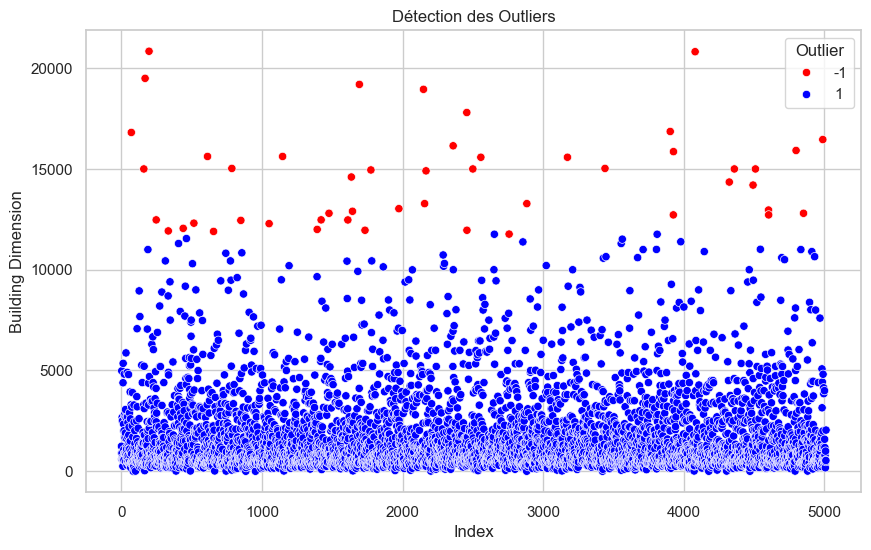

Outliers remplacés avec les percentiles et robust scaling appliqué.


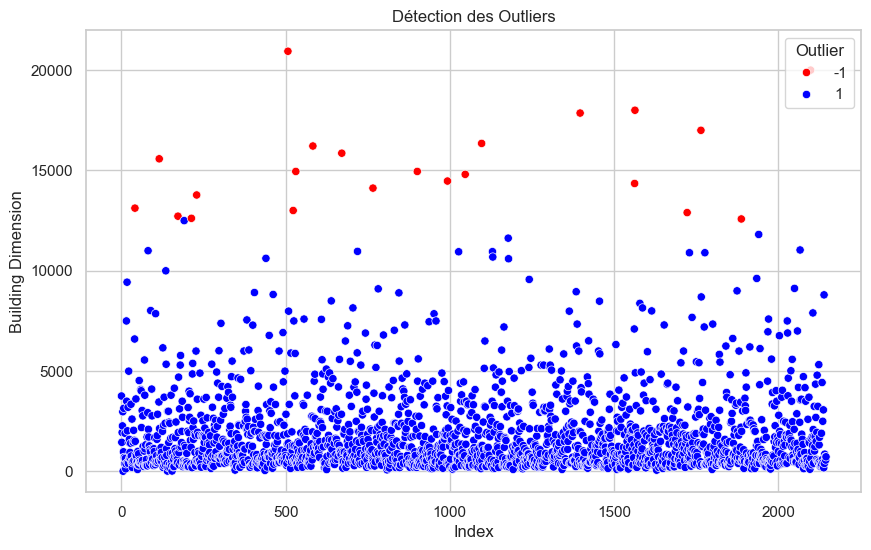

Outliers remplacés avec les percentiles et robust scaling appliqué.


In [24]:
def detect_and_scale_outliers(df):
    """
    Cette fonction détecte les outliers et les remplace par des valeurs appropriées.
    Utilise Isolation Forest ou One-Class SVM pour la détection.
    La méthode de remplacement et de scalage des valeurs est aussi choisie avec soin.
    """

    clf = IsolationForest(contamination=0.01, random_state=42)

    
    # Détection des outliers
    df['Outlier'] = clf.fit_predict(df[['Building Dimension']])
    # Filtrer les outliers
    outliers = df[df['Outlier'] == -1]
    # Visualisation des outliers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=df.index, y='Building Dimension', hue='Outlier', palette={1: 'blue', -1: 'red'})
    plt.title('Détection des Outliers')
    plt.xlabel('Index')
    plt.ylabel('Building Dimension')
    plt.legend(title='Outlier', loc='upper right')
    plt.show()

    # Méthode de remplacement des outliers
    # Utiliser les percentiles  pour remplacer les outliers
    lower_percentile = df['Building Dimension'].quantile(0.01)
    upper_percentile = df['Building Dimension'].quantile(0.99)
    
    # Remplacer les valeurs au-delà des percentiles par ces limites
    df.loc[df['Building Dimension'] < lower_percentile, 'Building Dimension'] = lower_percentile
    df.loc[df['Building Dimension'] > upper_percentile, 'Building Dimension'] = upper_percentile
    
    # Appliquer RobustScaler pour être plus résistant aux outliers après remplacement
    scaler = RobustScaler()
    df['Building Dimension'] = scaler.fit_transform(df[['Building Dimension']])

    # Supprimer la colonne Outlier après traitement
    df.drop(columns='Outlier', inplace=True)
    print("Outliers remplacés avec les percentiles et robust scaling appliqué.")
    
    return df

# Appliquer la fonction sur les données d'entraînement et de test
train_data = detect_and_scale_outliers(train_data)
test_data = detect_and_scale_outliers(test_data)

In [25]:
def transform_assurance_data(df):
    # Initialize the label encoder and ordinal encoder
    le = LabelEncoder()
    # Apply label encoding
    df['Building_Painted'] = le.fit_transform(df['Building_Painted'])
    df['Building_Fenced'] = le.fit_transform(df['Building_Fenced'])
    df['Garden'] = le.fit_transform(df['Garden'])
    df['Settlement'] = le.fit_transform(df['Settlement'])
    df['Building_Type'] = le.fit_transform(df['Building_Type'])
    df['Geo_Code'] = le.fit_transform(df['Geo_Code'])
    df['YearOfObservation'] = le.fit_transform(df['YearOfObservation'])

    return df
train_data = transform_assurance_data(train_data)
test_data = transform_assurance_data(test_data)
train_data


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,0,1.0,1.0,0,1,1,1,0.082045,3,0.0,889,non
1,0,1.0,0.0,0,1,1,1,-0.114401,1,0.0,632,non
2,1,1.0,1.0,1,0,0,0,2.245269,1,2.0,233,oui
3,4,0.5,0.0,0,1,1,1,-0.287737,3,0.0,556,oui
4,0,1.0,0.0,0,1,1,1,-0.114401,1,0.0,522,non
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1,1.0,0.0,0,1,1,1,-0.316626,2,0.0,254,oui
5008,0,0.5,0.0,1,0,0,0,-0.056623,0,2.0,306,non
5009,3,1.0,1.0,1,0,0,0,-0.357071,2,1.0,88,non
5010,0,0.5,0.0,1,0,0,0,-0.324715,0,2.0,856,non


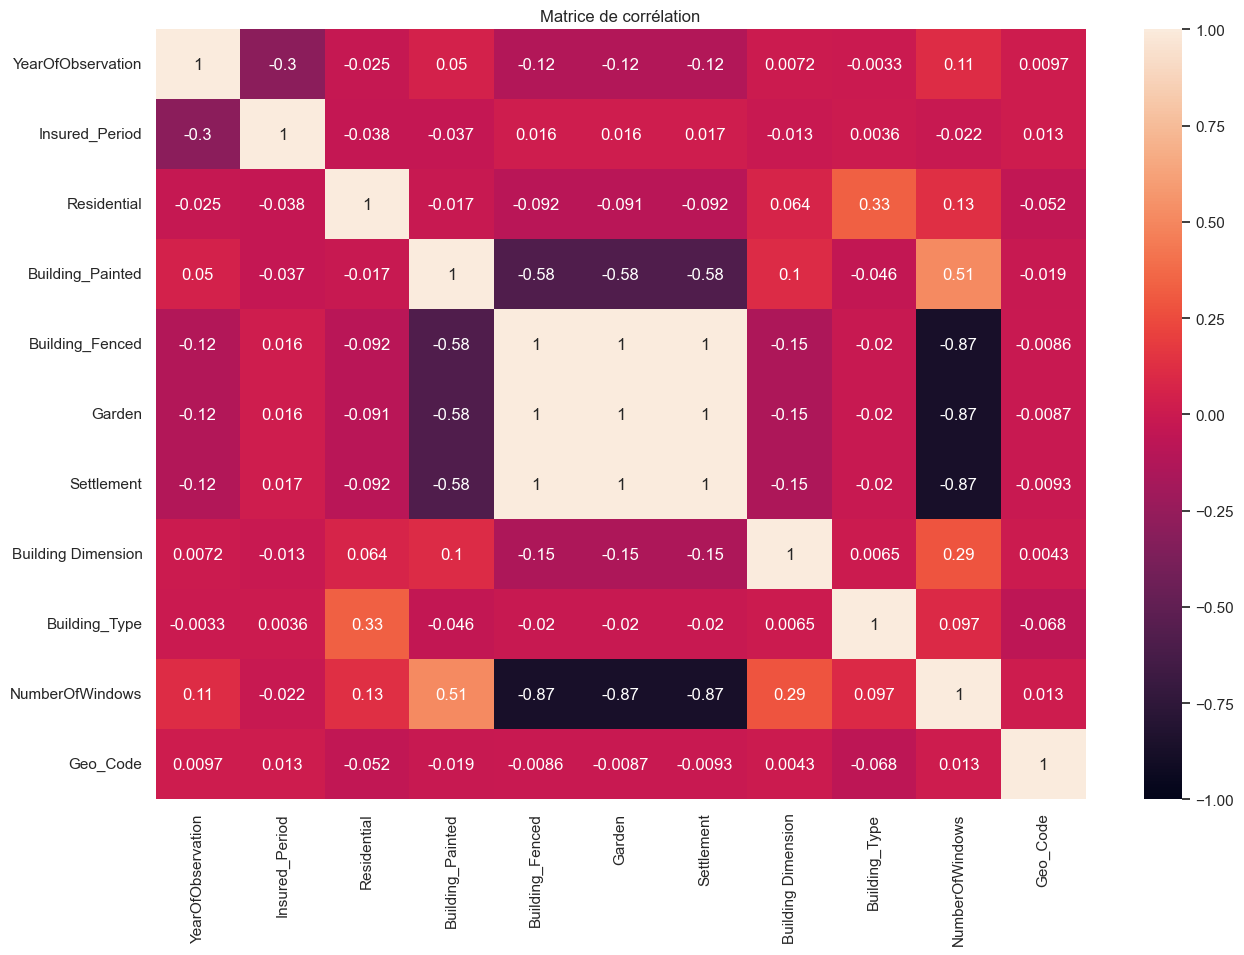

In [26]:
def correlation_matrix(df):
    fig=plt.figure(figsize=(15,10))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True,vmin=-1, vmax=1)
    plt.title('Matrice de corrélation')
    plt.show()
correlation_matrix(train_data)

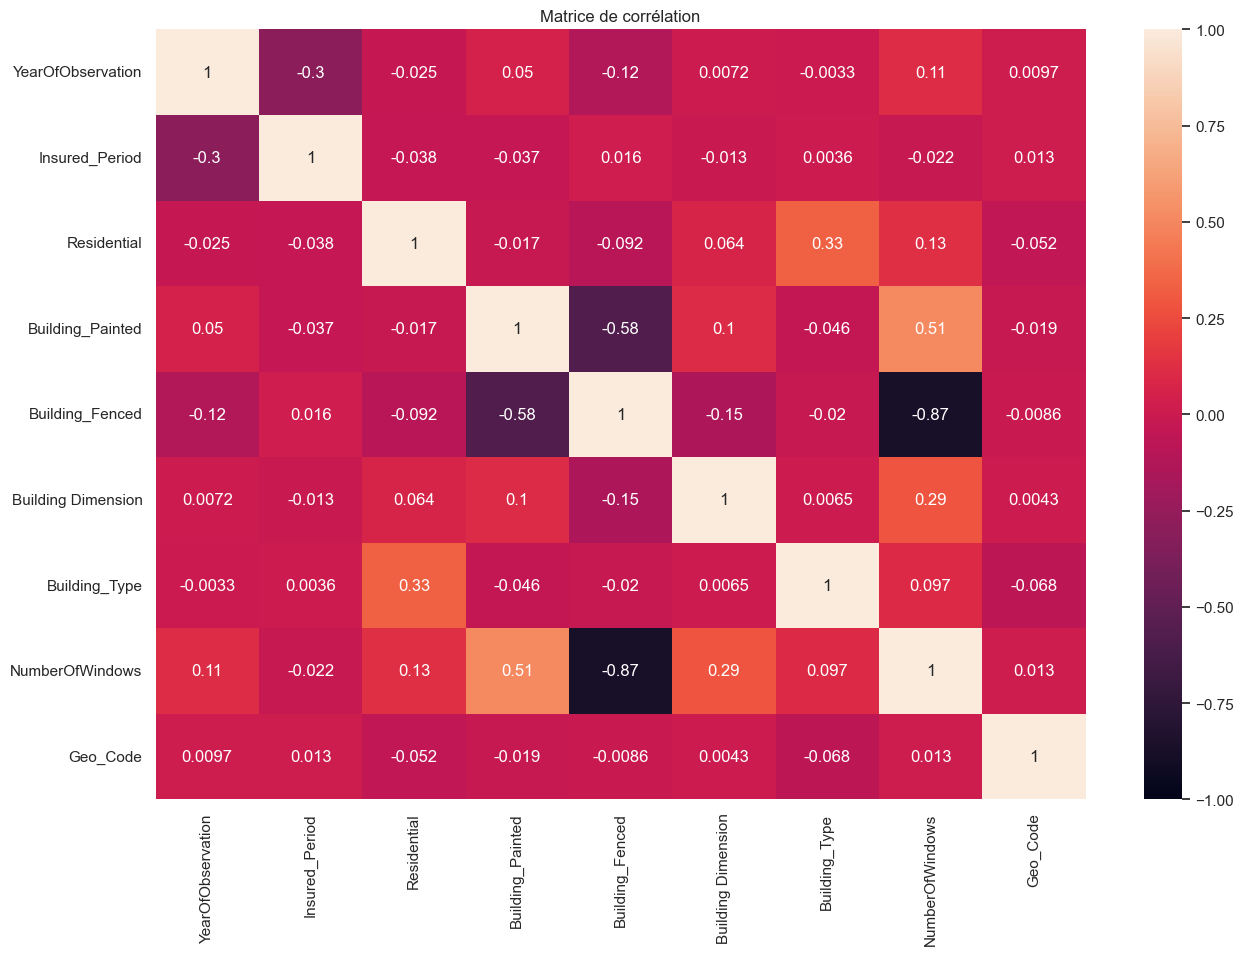

In [27]:
test_data.drop(columns=['Garden'],inplace=True)
test_data.drop(columns=['Settlement'],inplace=True)

train_data.drop(columns=['Garden'],inplace=True)
train_data.drop(columns=['Settlement'],inplace=True)

correlation_matrix(train_data)


Visualisation de la distribution de Geo_Code:


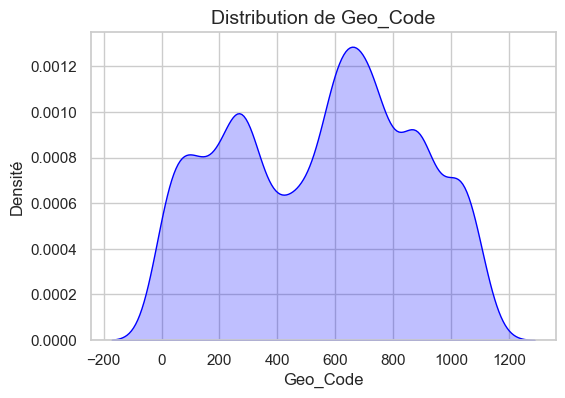

Geo_Code a été discrétisé en 4 catégories avec la stratégie "kmeans".


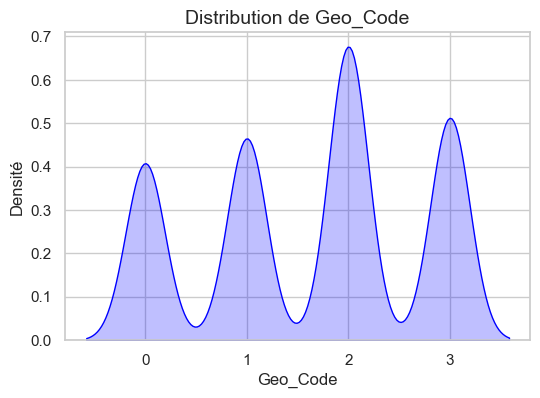

Visualisation de la distribution de Geo_Code:


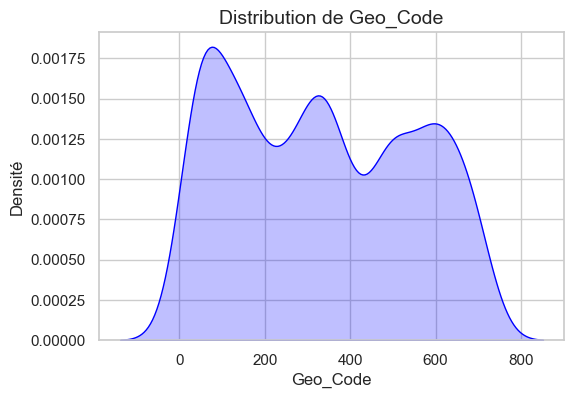

Geo_Code a été discrétisé en 4 catégories avec la stratégie "kmeans".


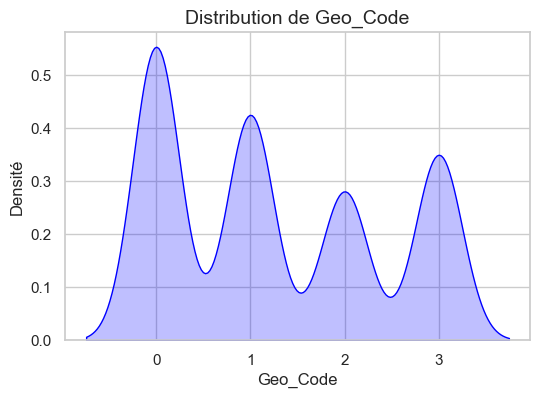

In [28]:
def visualize_and_discretize(df, column, n_bins=4, strategy='kmeans', figsize=(6, 4)):
    # Visualisation de la densité
    print(f"Visualisation de la distribution de {column}:")
    plt.figure(figsize=figsize)
    sns.kdeplot(df.loc[:, column], shade=True, color='blue')
    plt.title(f'Distribution de {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Densité', fontsize=12)
    plt.show()
    # Appliquer KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy, subsample=None)
    df[column] = enc.fit_transform(df[[column]])
    print(f'{column} a été discrétisé en {n_bins} catégories avec la stratégie "{strategy}".')
    plt.figure(figsize=figsize)
    sns.kdeplot(df.loc[:, column], shade=True, color='blue')
    plt.title(f'Distribution de {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Densité', fontsize=12)
    plt.show()
    return df

train_data = visualize_and_discretize(train_data, 'Geo_Code')
test_data= visualize_and_discretize(test_data, 'Geo_Code')

In [29]:
X_train = train_data.drop(columns=['Claim'])
y_train = LabelEncoder().fit_transform(train_data['Claim'])  # Encodage oui/non → 1/0
X_test = test_data.drop(columns=['Claim'])
y_test = LabelEncoder().fit_transform(test_data['Claim'])


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres :  {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Meilleur score de validation croisée :  0.7446361210942699
Accuracy sur l'entraînement : 0.8251
Accuracy sur le test : 0.7134
F1-score pondéré sur l'entraînement : 0.8221
F1-score pondéré sur le test : 0.7087
AUC-ROC sur le test : 0.6539


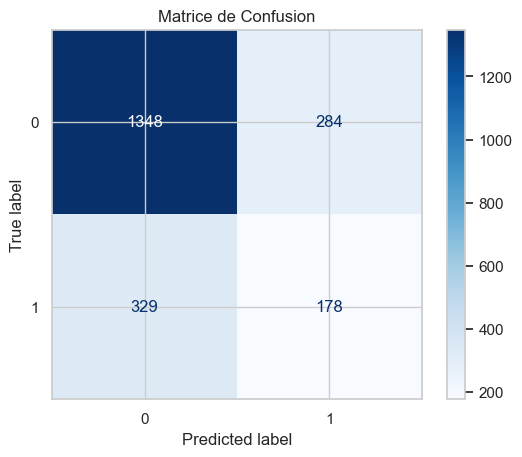

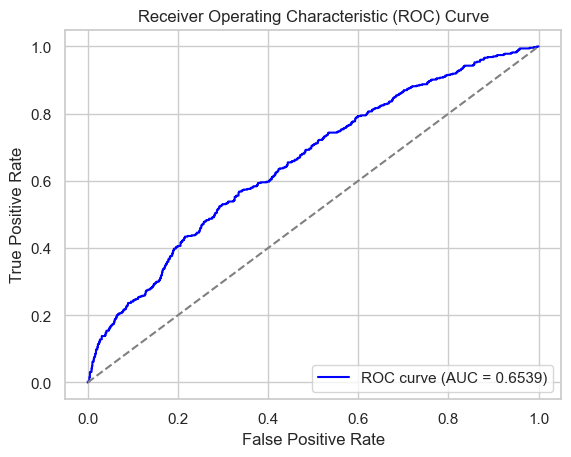

In [30]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, f1_score
import matplotlib.pyplot as plt

# Appliquer ADASYN pour gérer le déséquilibre des classes sur l'entraînement
adasyn = ADASYN(sampling_strategy=0.7, random_state=42, n_neighbors=5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Hyperparamètres pour RandomizedSearchCV
h_parameters = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9, 12],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Instancier le modèle XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Recherche d'hyperparamètres avec RandomizedSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = RandomizedSearchCV(estimator=xgb_model, param_distributions=h_parameters,
                        scoring="f1_micro", cv=skf, n_iter=20, random_state=42, verbose=1, n_jobs=-1)
gs.fit(X_train_resampled, y_train_resampled)

# Meilleurs paramètres et score
print("Meilleurs paramètres : ", gs.best_params_)
print("Meilleur score de validation croisée : ", gs.best_score_)

# Prédictions
y_pred_train = gs.best_estimator_.predict(X_train_resampled)
y_pred_test = gs.best_estimator_.predict(X_test)

# Calcul des accuracies
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy sur l'entraînement : {accuracy_train:.4f}")
print(f"Accuracy sur le test : {accuracy_test:.4f}")

# Calcul du F1-score pondéré
f1_train = f1_score(y_train_resampled, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"F1-score pondéré sur l'entraînement : {f1_train:.4f}")
print(f"F1-score pondéré sur le test : {f1_test:.4f}")

# Calcul de l'AUC-ROC
roc_auc_test = roc_auc_score(y_test, gs.best_estimator_.predict_proba(X_test)[:, 1])
print(f"AUC-ROC sur le test : {roc_auc_test:.4f}")

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

# Affichage de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, gs.best_estimator_.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres :  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Meilleur score de validation croisée :  0.7615265841392203
Accuracy sur l'entraînement : 0.9460
Accuracy sur le test : 0.7232
F1-score pondéré sur l'entraînement : 0.9458
F1-score pondéré sur le test : 0.7109
AUC-ROC sur le test : 0.6529


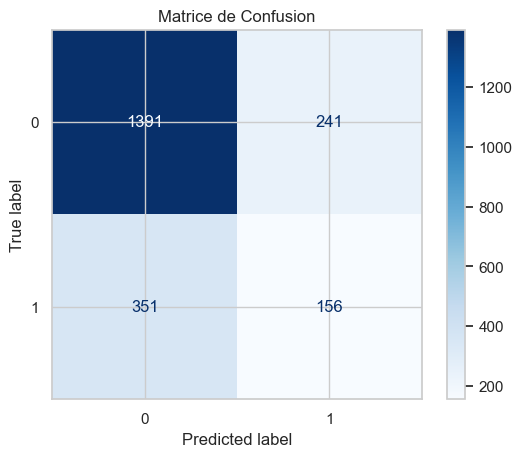

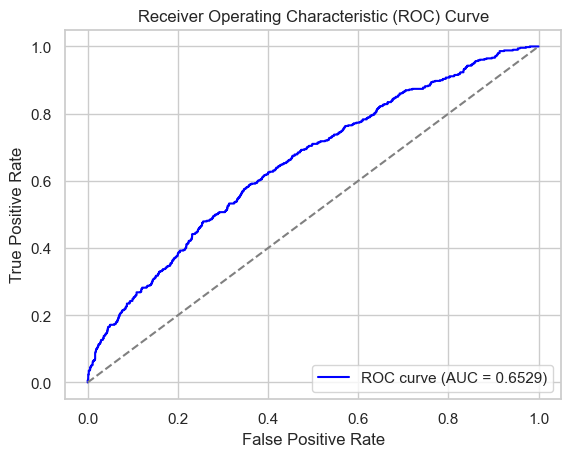

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, f1_score

adasyn = ADASYN(sampling_strategy=0.7, random_state=42, n_neighbors=5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Hyperparamètres pour RandomizedSearchCV
h_parameters = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instancier le modèle Random Forest
rf_model = RandomForestClassifier(random_state=1)

# Recherche d'hyperparamètres avec RandomizedSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = RandomizedSearchCV(estimator=rf_model, param_distributions=h_parameters,
                        scoring="f1_micro", cv=skf, n_iter=20, random_state=42, verbose=1, n_jobs=-1)
gs.fit(X_train_resampled, y_train_resampled)

# Meilleurs paramètres et score
print("Meilleurs paramètres : ", gs.best_params_)
print("Meilleur score de validation croisée : ", gs.best_score_)

# Prédictions
y_pred_train = gs.best_estimator_.predict(X_train_resampled)
y_pred_test = gs.best_estimator_.predict(X_test)

# Calcul des accuracies
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy sur l'entraînement : {accuracy_train:.4f}")
print(f"Accuracy sur le test : {accuracy_test:.4f}")

# Calcul du F1-score pondéré
f1_train = f1_score(y_train_resampled, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"F1-score pondéré sur l'entraînement : {f1_train:.4f}")
print(f"F1-score pondéré sur le test : {f1_test:.4f}")

# Calcul de l'AUC-ROC
roc_auc_test = roc_auc_score(y_test, gs.best_estimator_.predict_proba(X_test)[:, 1])
print(f"AUC-ROC sur le test : {roc_auc_test:.4f}")

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

# Affichage de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, gs.best_estimator_.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres :  {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 9, 'learning_rate': 0.1}
Meilleur score de validation croisée :  0.7630491171415178
Accuracy sur l'entraînement : 0.9868
Accuracy sur le test : 0.7139
F1-score pondéré sur l'entraînement : 0.9868
F1-score pondéré sur le test : 0.7060
AUC-ROC sur le test : 0.6349


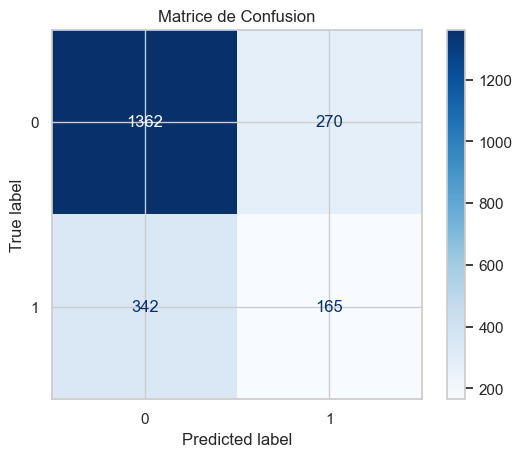

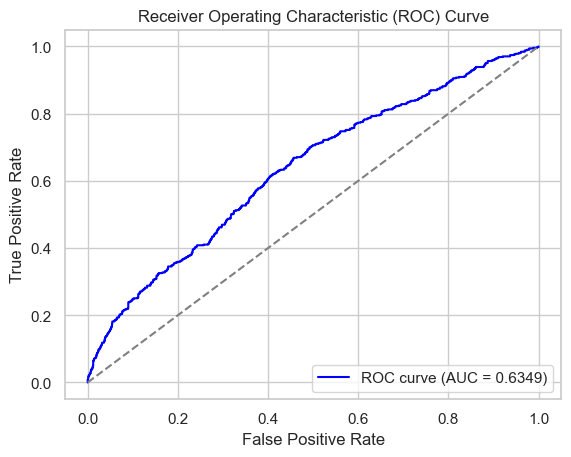

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, f1_score

# Appliquer SMOTE pour gérer le déséquilibre des classes sur l'entraînement
# X_train_resampled = X_train
# y_train_resampled = y_train
adasyn = ADASYN(sampling_strategy=0.7, random_state=42, n_neighbors=5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
# Hyperparamètres pour RandomizedSearchCV
h_parameters = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9, 12],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instancier le modèle Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=1)

# Recherche d'hyperparamètres avec RandomizedSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = RandomizedSearchCV(estimator=gb_model, param_distributions=h_parameters,
                        scoring="f1_micro", cv=skf, n_iter=20, random_state=42, verbose=1, n_jobs=-1)
gs.fit(X_train_resampled, y_train_resampled)

# Meilleurs paramètres et score
print("Meilleurs paramètres : ", gs.best_params_)
print("Meilleur score de validation croisée : ", gs.best_score_)

# Prédictions
y_pred_train = gs.best_estimator_.predict(X_train_resampled)
y_pred_test = gs.best_estimator_.predict(X_test)

# Calcul des accuracies
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy sur l'entraînement : {accuracy_train:.4f}")
print(f"Accuracy sur le test : {accuracy_test:.4f}")

# Calcul du F1-score pondéré
f1_train = f1_score(y_train_resampled, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"F1-score pondéré sur l'entraînement : {f1_train:.4f}")
print(f"F1-score pondéré sur le test : {f1_test:.4f}")

# Calcul de l'AUC-ROC
roc_auc_test = roc_auc_score(y_test, gs.best_estimator_.predict_proba(X_test)[:, 1])
print(f"AUC-ROC sur le test : {roc_auc_test:.4f}")

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

# Affichage de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, gs.best_estimator_.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres :  {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 100}
Meilleur score de validation croisée :  0.6808681007691373
Accuracy sur l'entraînement : 0.7439
Accuracy sur le test : 0.7326
F1-score pondéré sur l'entraînement : 0.7367
F1-score pondéré sur le test : 0.7199
AUC-ROC sur le test : 0.6114


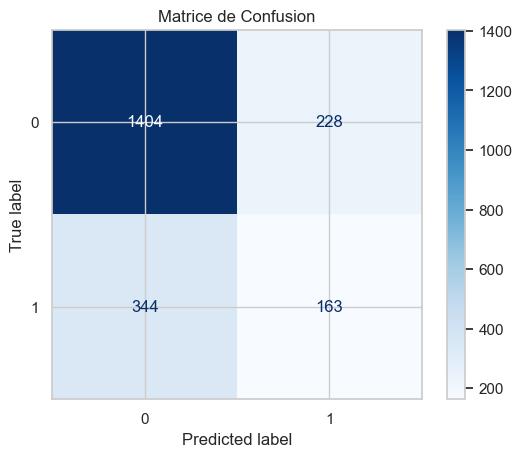

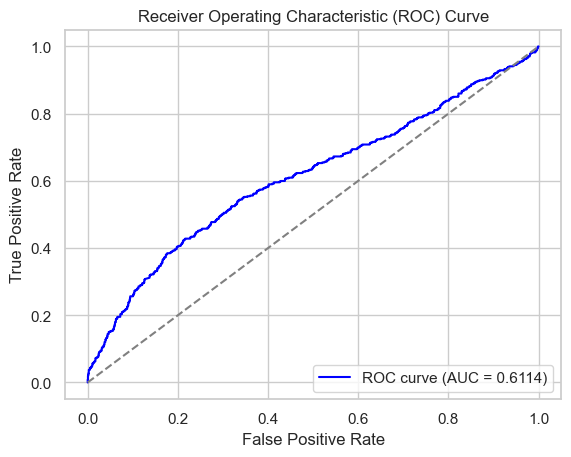

In [33]:
    # Importation des bibliothèques
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, f1_score
    from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from imblearn.over_sampling import ADASYN
    import matplotlib.pyplot as plt
    import pandas as pd

    # Appliquer ADASYN pour gérer le déséquilibre des classes sur l'entraînement
    adasyn = ADASYN(sampling_strategy=0.7, random_state=42, n_neighbors=5)
    X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

    # Hyperparamètres pour RandomizedSearchCV (SVM)
    h_parameters = {
        'C': [0.1, 1, 10, 100],  # Paramètre de régularisation
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Type de noyau
        'gamma': ['scale', 'auto'],  # Coefficient pour certains noyaux
        'degree': [2, 3, 4],  # Degré du polynôme (pour le noyau 'poly')
    }

    # Instancier le modèle SVM
    svm_model = SVC(probability=True, random_state=42)

    # Recherche d'hyperparamètres avec RandomizedSearchCV
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    gs = RandomizedSearchCV(estimator=svm_model, param_distributions=h_parameters,
                            scoring="f1_micro", cv=skf, n_iter=20, random_state=42, verbose=1, n_jobs=-1)
    gs.fit(X_train_resampled, y_train_resampled)

    # Meilleurs paramètres et score
    print("Meilleurs paramètres : ", gs.best_params_)
    print("Meilleur score de validation croisée : ", gs.best_score_)

    # Prédictions
    y_pred_train = gs.best_estimator_.predict(X_train_resampled)
    y_pred_test = gs.best_estimator_.predict(X_test)

    # Calcul des accuracies
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"Accuracy sur l'entraînement : {accuracy_train:.4f}")
    print(f"Accuracy sur le test : {accuracy_test:.4f}")

    # Calcul du F1-score pondéré
    f1_train = f1_score(y_train_resampled, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print(f"F1-score pondéré sur l'entraînement : {f1_train:.4f}")
    print(f"F1-score pondéré sur le test : {f1_test:.4f}")

    # Calcul de l'AUC-ROC
    roc_auc_test = roc_auc_score(y_test, gs.best_estimator_.predict_proba(X_test)[:, 1])
    print(f"AUC-ROC sur le test : {roc_auc_test:.4f}")

    # Affichage de la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matrice de Confusion')
    plt.show()

    # Affichage de la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, gs.best_estimator_.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_test:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [34]:
meta_classifier= LogisticRegression()

# Définir le classificateur de stacking
stacking_clf = StackingClassifier(
    estimators=[('model1', rf_model), ('model2', gb_model), ('model3', xgb_model), ('m4', svm_model)],
    final_estimator=meta_classifier,
    stack_method="predict_proba",
    cv=3,
    passthrough=False
)

# Entraîner le classificateur de stacking
stacking_clf.fit(X_train, y_train)

# Prédictions
y_pred_train = stacking_clf.predict(X_train)
y_pred_test = stacking_clf.predict(X_test)

# Calcul des accuracies
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy sur l'entraînement : {accuracy_train:.4f}")
print(f"Accuracy sur le test : {accuracy_test:.4f}")

# Calcul du F1-score pondéré
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"F1-score pondéré sur l'entraînement : {f1_train:.4f}")
print(f"F1-score pondéré sur le test : {f1_test:.4f}")

Accuracy sur l'entraînement : 0.8226
Accuracy sur le test : 0.7742
F1-score pondéré sur l'entraînement : 0.7816
F1-score pondéré sur le test : 0.7165
